In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

In [9]:
df=pd.read_csv('../heart_disease/heart_disease.csv')
#df.isnull().sum() #check for null values 
#df.columns

In [10]:
X = df.drop (labels = ['HeartDiseaseorAttack'], axis =1)
y = df['HeartDiseaseorAttack']

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

scaleddata=scaler.transform(X)

In [27]:
#from https://www.section.io/engineering-education/recursive-feature-elimination/#:~:text=the%20RFE%20algorithm.-,Implementing%20RFE%20algorithm,data%20into%20a%20decision%20tree.&text=The%20output%20above%20shows%20that%20the%20optimal%20number%20of%20features%20is%20three.
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
model = DecisionTreeClassifier()

min_features_to_select=1
#balanced_accuracy, or f1_weighted or recall
rfecv = RFECV(estimator= model, step = 1, min_features_to_select=min_features_to_select, cv = 5, scoring="balanced_accuracy", n_jobs=-1)
rfecv = rfecv.fit(X, y)

print("The optimal number of features:", rfecv.n_features_)
print("Best features:", X.columns[rfecv.support_])

The optimal number of features: 20
Best features: Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Diabetes',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')


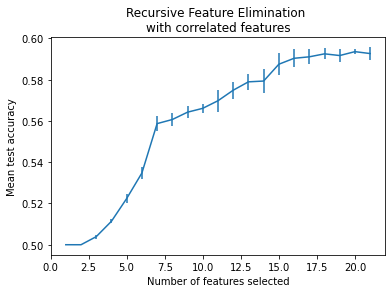

In [28]:
#from Scikit-learn documentation
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()